In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
tae_data = pd.read_csv('tae.data',header=None,  names=["English speaker", "Course instructor", "Course", "Semester", "Size", "Attribute"])
print(tae_data)

     English speaker  Course instructor  Course  Semester  Size  Attribute
0                  1                 23       3         1    19          3
1                  2                 15       3         1    17          3
2                  1                 23       3         2    49          3
3                  1                  5       2         2    33          3
4                  2                  7      11         2    55          3
..               ...                ...     ...       ...   ...        ...
146                2                  3       2         2    26          1
147                2                 10       3         2    12          1
148                1                 18       7         2    48          1
149                2                 22       1         2    51          1
150                2                  2      10         2    27          1

[151 rows x 6 columns]


In [3]:
X = tae_data[tae_data.columns[:5]]
X

,English speaker,Course instructor,Course,Semester,Size
0,1,23,3,1,19
1,2,15,3,1,17
2,1,23,3,2,49
3,1,5,2,2,33
4,2,7,11,2,55
...,...,...,...,...,...
146,2,3,2,2,26
147,2,10,3,2,12
148,1,18,7,2,48
149,2,22,1,2,51


In [4]:
y = tae_data[tae_data.columns[5:6]]
y

,Attribute
0,3
1,3
2,3
3,3
4,3
...,...
146,1
147,1
148,1
149,1


In [5]:
y.values.ravel()

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), random_state=0)

In [7]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.61
Accuracy of K-NN classifier on test set: 0.42


In [8]:
predicted = knn.predict(X_test)
expected = y_test
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           1       0.32      1.00      0.48         7
           2       0.50      0.25      0.33        16
           3       0.62      0.33      0.43        15

    accuracy                           0.42        38
   macro avg       0.48      0.53      0.42        38
weighted avg       0.52      0.42      0.40        38



In [9]:
knn = KNeighborsClassifier(n_neighbors=4)
y_pred = cross_val_predict(knn, X, y.values.ravel(), cv=5)

In [10]:
y_pred

array([3, 3, 3, 1, 1, 2, 1, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2,
       1, 1, 2, 2, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 3, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3,
       2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 3, 1, 1, 2, 2, 1, 3, 3,
       1, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1,
       3, 1, 3, 3, 1, 2, 3, 1, 1, 3, 2, 2, 2, 1, 1, 1, 3, 2, 1, 1, 3, 1,
       3, 3, 1, 3, 2, 1, 1, 3, 1, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1],
      dtype=int64)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
print(mean_squared_error(y,y_pred))
print(r2_score(y,y_pred))

1.0463576158940397
-0.565280146962341


In [13]:
error = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y.values.ravel(), cv=6)
    error.append(mean_squared_error(y,y_pred)) 

In [14]:
import matplotlib.pyplot as plt

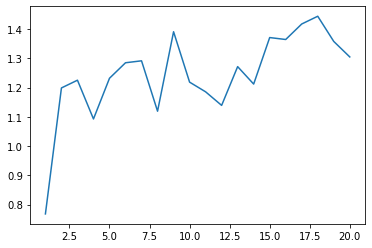

In [15]:
plt.plot(range(1,21),error)